## Kvantummechanikai szuperpozíció és mérés



### Nézzünk egy egyszerű áramkört!
- Olvassuk ki a kvantumállapotot, mielőtt hozzáadnánk a mérést!

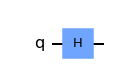

In [9]:
from qiskit import QuantumCircuit, execute, Aer

circuit0 = QuantumCircuit(1)
circuit0.h(0)

circuit0.draw(output = 'mpl')

In [10]:
# Ismét a 'statevector_simulator' elnevezésű backend-en futtatunk
job=execute(circuit0,Aer.get_backend('statevector_simulator'),optimization_level=0)

# A futtatás eredményét tegyük bele a 'quantum_state' objektumba
quantum_state_0 = job.result().get_statevector(circuit0)

print(quantum_state_0)

[0.70710678+0.j 0.70710678+0.j]


Ez a kvantumállapot nem más, mint a

&emsp;&emsp;&emsp;&emsp;&emsp; $|\psi\rangle=\begin{pmatrix} 0,70710678 \\ 0,70710678 \end{pmatrix}=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)=|+\rangle$.

Vagyis azt látjuk, hogy a Hadamard-kapu hatása

&emsp;&emsp;&emsp;&emsp;&emsp; $|0\rangle\rightarrow \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)=|+\rangle$

#### Tehát az állapot a mérés előtt még tartalmazza a '0'-t és az '1'-et is, a véletlenszerű (pénzfeldobásra hasonlító) eredményt a mérés hatására tapasztaljuk. 

### Tegyük most be a mérést is az áramkörbe!

- Használjuk a "qasm_simulator" elnevezésű szimulátort

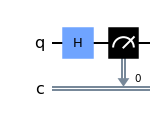

In [11]:
from qiskit import QuantumCircuit, execute, Aer

circuit = QuantumCircuit(1,1) 

circuit.h(0)

# Tegyünk be egy mérést. (Megj.: a mérés eredményét csak klasszikus biteken tudjuk tárolni)
circuit.measure(0,0)

circuit.draw(output = 'mpl')

Futtassuk az áramkört először csak 1-szer, majd írassuk ki a mérés eredményét!

In [12]:
job = execute(circuit , Aer.get_backend('qasm_simulator'), shots=1)

#a 'job' objektum tartalmazza a mérésünk eredményét, ebből az alábbi módon nyerhetjük ki azt 
counts = job.result().get_counts(circuit)

#Írassuk ki a mérési eredményt
print(counts)

{'0': 1}


#### Van, aki 0-t, van aki 1-et kapott eredményül 

### Kvantummechanikai mérés

- A mérés hatására a kvantumbit állapota "beugrik" valamelyik bázisállapotba, ezért vagy 0-t, vagy 1-et kapunk eredményül
    - Ha még egyszer mérünk, akkor az eredmény már nem változik meg
    - Megj.: A kvantumszámítógépekben lévő mérés mindig csak 0-t vagy 1-et ad eredményül (azt mondjuk, hogy az ún. számítási bázisban mérnek), de elvben használhatnánk más bázist is, pl. a {$|+\rangle$,$|-\rangle$} bázist

#### Most futtassuk le az áramkört 10, 100, 1000 shot-tal! Mit tapasztalunk?

In [13]:
job = execute(circuit , Aer.get_backend('qasm_simulator'), shots=1000)

counts = job.result().get_counts(circuit)

print(counts)

{'1': 490, '0': 510}


#### Határozzuk meg a két eredmény relatív gyakoriságát!

In [14]:
#számoljuk meg, hogy hányszor mértünk 0-t és 1-et.
n_zeros = counts['0']
n_ones = counts['1']

#Írassuk ki, a '0' és '1' eredmények relatív gyakoriságát.
print("A 0 meresi eredmeny relatív gyakorisága:", n_zeros/(n_zeros+n_ones))
print("Az 1 meresi eredmeny relatív gyakorisága:", n_ones/(n_zeros+n_ones))

A 0 meresi eredmeny relatív gyakorisága: 0.51
Az 1 meresi eredmeny relatív gyakorisága: 0.49


#### A relatív gyakorisággal becsülhetjük az adott mérési eredmény valószínűségét.

#### Az eredmények egyre inkább 1/2 - 1/2 arányban oszlanak meg a két lehetőség között
- Összhangban azzal, hogy az állapotunk amplitúdói $a=\frac{1}{\sqrt{2}}$ és $b=\frac{1}{\sqrt{2}}$ és a '0' mérési eredmény valószínűsége $P(0)=|a|^2$, az '1'-é pedig $P(1)=|b|^2$.

### A statisztikus hibák vizsgálata
- Tekintsük az eddig vizsgált egy-qubites Hadamard-kapus áramkört! 


- Itt az áramkör végén a méréskor két kimenetel lehetséges: '0' vagy '1'  
    - Ezek komplementerek, ezért tekinthetjük az egyiket a sikeresnek (legyen ez a '0'), a másikat a sikertelennek ('1')  
    - Jelöljük a sikeres esemény valószínűségét $p$-vel (ebben az esetben $p=\frac{1}{2}$)  
    - a sikertelen események valószínűsége $q=1-p$   


- Tudjuk, hogy $N$ független, két kimenetelű mérésből:  
    - a sikeres mérések várható értéke: $Np$ 
    <br>
    - a sikeres mérések szórása: $\sqrt{Npq}$  
    
    
- Ha nem a mérések számát, hanem azok valószínűségét tekintjük, akkor a fenti gondolatmenetben szereplő mennyiségeket el kell osztanunk $N$-nel  
    - A sikeres mérések valószínűségének várható értéke: $\dfrac{Np}{N}=p$
    - A sikeres mérések valószínűségének szórása: $\dfrac{\sqrt{Npq}}{N}=\dfrac{\sqrt{pq}}{\sqrt{N}}$
        - Vagyis a szórás annál kisebb, minél nagyobb a mérések $N$ száma $\Rightarrow$ általában célszerű sok mérést végezni

#### Írjunk egy olyan programot:
- amely lefuttatja az egy-qubites Hadamard-kapus áramkört 10-szer egymás után $N=2^4,2^6,2^8,2^{10},2^{12}=16,64,256,1024,4096$ méréssel (shot)
- majd ábrázoljuk a '0' eredmény becsült valószínűségeit az elméletből kapható szórással együtt a $\sqrt{N}$ függvényében!
    - $\sqrt{N}=2^2,2^3,2^4,2^5,2^6=4,8,16,32,64$

In [7]:
from qiskit import QuantumCircuit, execute, Aer
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)

# Importáljuk a math csomagot
import math

# Hozzunk létre üres listákat az egyes becsült valószínűségeknek és egyet a mérés-számoknak
p_i_list = []
N_list=[]

# Ez a lépés csak azért van itt, hogy ha többször szeretnénk futtatni ezt a cellát, akkor mindig 
# kiürítsük az előző listákat
p_i_list.clear()
N_list.clear()

# Legyen 10 kísérletünk minden mérés-számhoz
n_kiserlet=10

# Hozzunk létre egy "for" ciklust a különböző mérés-számok beállítására
for j in range(5):
    
    # Állítsuk be a mérések számát 
    n_shots=pow(2,2*(j+2))
    
    # Csináljunk egy újabb "for" ciklust az egyes kísérleteknek
    for i in range(n_kiserlet):

        job = execute(circuit , Aer.get_backend('qasm_simulator'), shots=n_shots)
        counts = job.result().get_counts(circuit)

        n_zeros = counts['0']
        n_ones = counts['1']

        # Számítsuk ki az adott kísérlet esetében kapott becsült valószínűséget 
        # (elég csak a '0' eredményhez)
        p_i = n_zeros/(n_zeros+n_ones)

        # A kapott valószínűséget adjuk hozzá a listánkhoz
        p_i_list.append(p_i)
        # A mérés-számokat tartalmazó listánkhoz is adjuk hozzá az aktuális mérés-számot 
        # (ez majd az ábrához kell)
        N_list.append(math.sqrt(n_shots))

Ábrázoljuk a kapott mérési eredményeket és az elmélet alapján várt szórást is rajzoljuk fel.

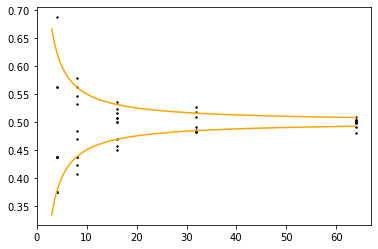

In [8]:
# Importáljuk a szükséges csomagokat
import matplotlib.pyplot as plt
import numpy as np

# Az áramkörhöz tartozóan a '0' eredmény elméletből ismert értéke
p_ideal=0.5
q_ideal=1-p_ideal

# Állítsuk be az x-tengelyen milyen beosztással és milyen tartományban szeretnénk ábrázolni
# Az x értékek a mérés-számoknak felelnek meg (amelyekből már négyzetgyököt vontunk)
# A sqrt(N)-ek 2^2-tól 2^6-ig mennek, azaz 4-től 64-ig
x = np.arange(3, 64, 0.1)
# Számítsuk ki hozzá a két görbét (mivel a mérés-számokból már gyököt vontunk, ezért itt már 
# csak azok reciprokát kell vennünk, majd megszoroznunk sqrt(p*(1-p))-vel)
# a szórást a p_ideal-hoz képest pozitív és negatív irányban is értelmezzük, 
# ezért két görbét rajzolunk
y1 = p_ideal+math.sqrt(p_ideal*q_ideal)*np.reciprocal(x)
y2 = p_ideal-math.sqrt(p_ideal*q_ideal)*np.reciprocal(x)
    
# plot-oljuk az így kapott pontokat
plt.plot(x, y1, color="orange")
plt.plot(x, y2, color="orange") 
plt.scatter(N_list, p_i_list, s=2, color="black")
plt.show()

#### Látható, hogy minél több mérést végzünk, annál jobban lecsökken a statisztikai hiba.
#### A valódi kvantumszámítógépeken sok különböző hiba felléphet, ezek gyakran a mérések számának növelésével sem küszöbölhetők ki.

### Valódi kvantumszámítógépen való futtatás
- Külön .ipynb fájlban.